In [33]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

mushrooms = 'C:/Users/Jonathan/Downloads/mushrooms.csv'
dataset=pd.read_csv(mushrooms)

dataset['class'].unique()


array(['p', 'e'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in dataset.columns:
    dataset[col] = labelencoder.fit_transform(dataset[col])
 
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [36]:
dataset['stalk-color-above-ring'].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8], dtype=int64)

In [37]:
print(dataset.groupby('class').size())

class
0    4208
1    3916
dtype: int64


In [38]:
X = dataset.iloc[:,1:23]  # all rows, all the features and no labels
y = dataset.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [39]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [40]:
dataset.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [41]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -2.98716006e-17],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  8.17047124e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  3.62451933e-17],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  1.31607921e-18],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -7.47641463e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  1.39554149e-19]])

In [43]:
covariance=pca.get_covariance()
#covariance

In [44]:
explained_variance=pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 2.78307611e-33])

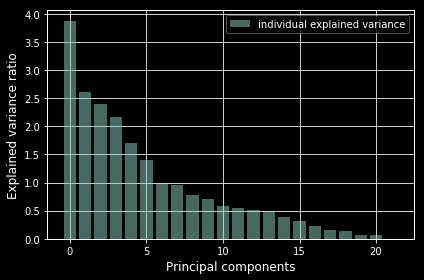

In [45]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

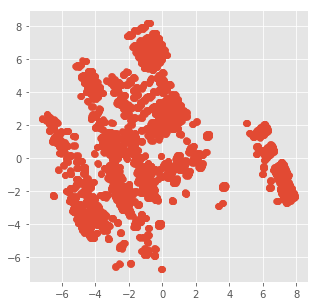

In [46]:
N=dataset.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

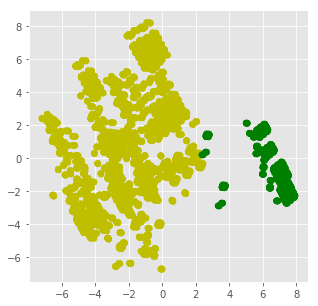

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r',
                   3: 'b'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

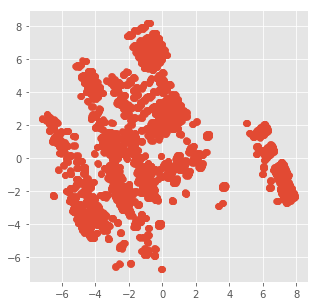

In [48]:
N=dataset.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

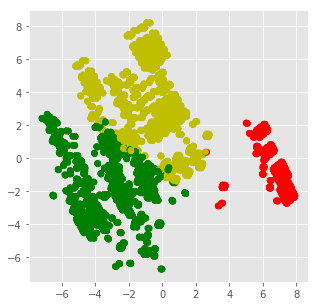

In [49]:

kmeans = KMeans(n_clusters=3, random_state=5)
X_clustered = kmeans.fit_predict(N)


label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

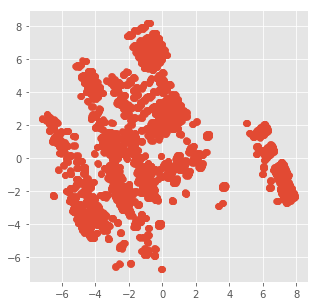

In [50]:
N=dataset.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

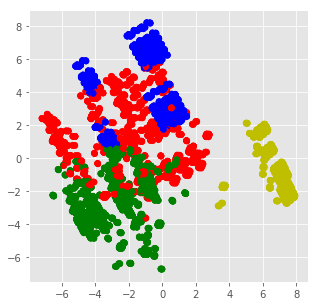

In [51]:

kmeans = KMeans(n_clusters=4, random_state=5)
X_clustered = kmeans.fit_predict(N)

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

In [52]:
pca_modified=PCA(n_components=17)
pca_modified.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [55]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [57]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]], dtype=int64)

In [58]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9579388560157791

In [59]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

Text(0.5,0,'False Positive Rate')

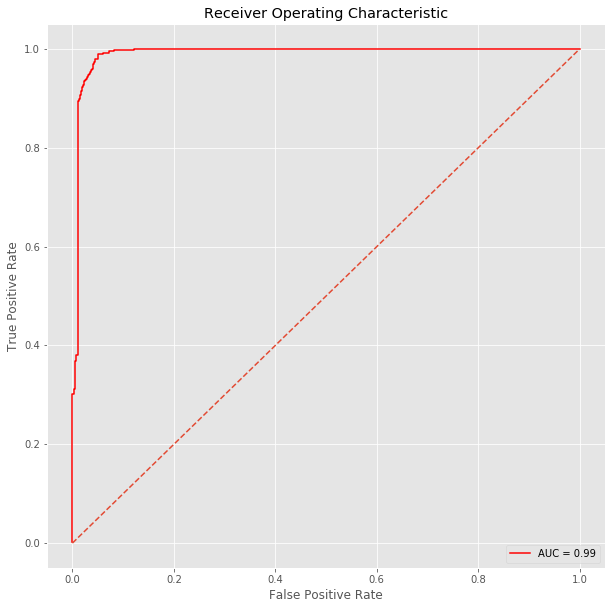

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [62]:
dataset.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [111]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=2)

In [112]:
LR.fit(X_train,y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
print(LR.best_params_)

{'C': 1000, 'penalty': 'l1'}


In [114]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [115]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[824,  21],
       [ 23, 757]], dtype=int64)

In [68]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.97      0.98      0.97       845\n          1       0.97      0.97      0.97       780\n\navg / total       0.97      0.97      0.97      1625\n'

In [69]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9728303747534518

In [70]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.991624943104233

In [105]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=2)

In [106]:
LR.fit(X_train,y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
print(LR.best_params_)

{'C': 100, 'penalty': 'l1'}


In [108]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [109]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[824,  21],
       [ 23, 757]], dtype=int64)

In [110]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9728303747534518

Text(0.5,0,'False Positive Rate')

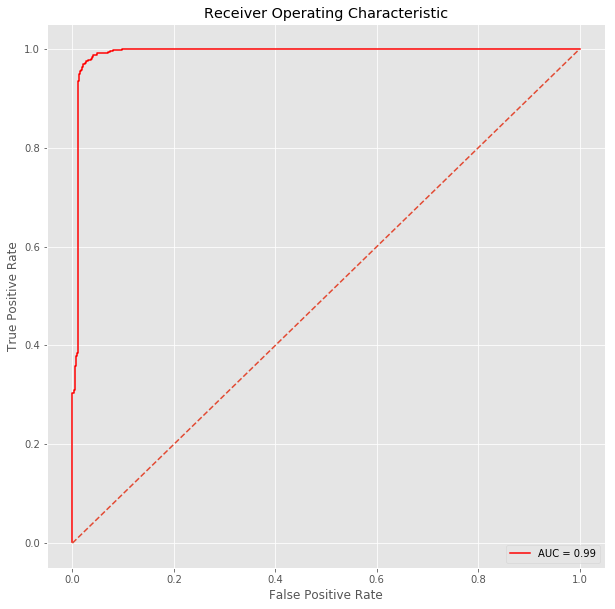

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [72]:
LR_ridge= LogisticRegression(penalty='l2')
LR_ridge.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
y_prob = LR_ridge.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(X_test, y_pred)

1.0

In [74]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]], dtype=int64)

In [75]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.96      0.96      0.96       845\n          1       0.96      0.95      0.96       780\n\navg / total       0.96      0.96      0.96      1625\n'

In [76]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9579388560157791

In [77]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

Text(0.5,0,'False Positive Rate')

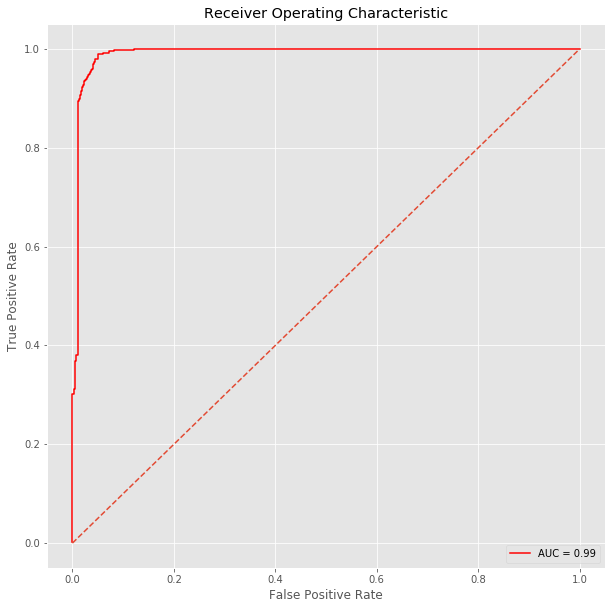

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [132]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:

y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [134]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]], dtype=int64)

In [135]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9579388560157791

In [136]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=4)

In [152]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

In [153]:
LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [154]:
print(LR.best_params_)

{'C': 1000, 'penalty': 'l2'}


In [155]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [156]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1627,   64],
       [  60, 1499]], dtype=int64)

In [157]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.96      0.96      0.96      1691\n          1       0.96      0.96      0.96      1559\n\navg / total       0.96      0.96      0.96      3250\n'

In [158]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9618331816669694

In [124]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9910896801502427

In [125]:
LR_ridge= LogisticRegression(penalty='l2')
LR_ridge.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
y_prob = LR_ridge.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(X_test, y_pred)

1.0

In [127]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1617,   74],
       [  84, 1475]], dtype=int64)

In [128]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.95      0.96      0.95      1691\n          1       0.95      0.95      0.95      1559\n\navg / total       0.95      0.95      0.95      3250\n'

In [129]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9511791095673469

In [130]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9879564642303195